In [2]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

import src.bayesian_stats as bst


In [3]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(seed=42)

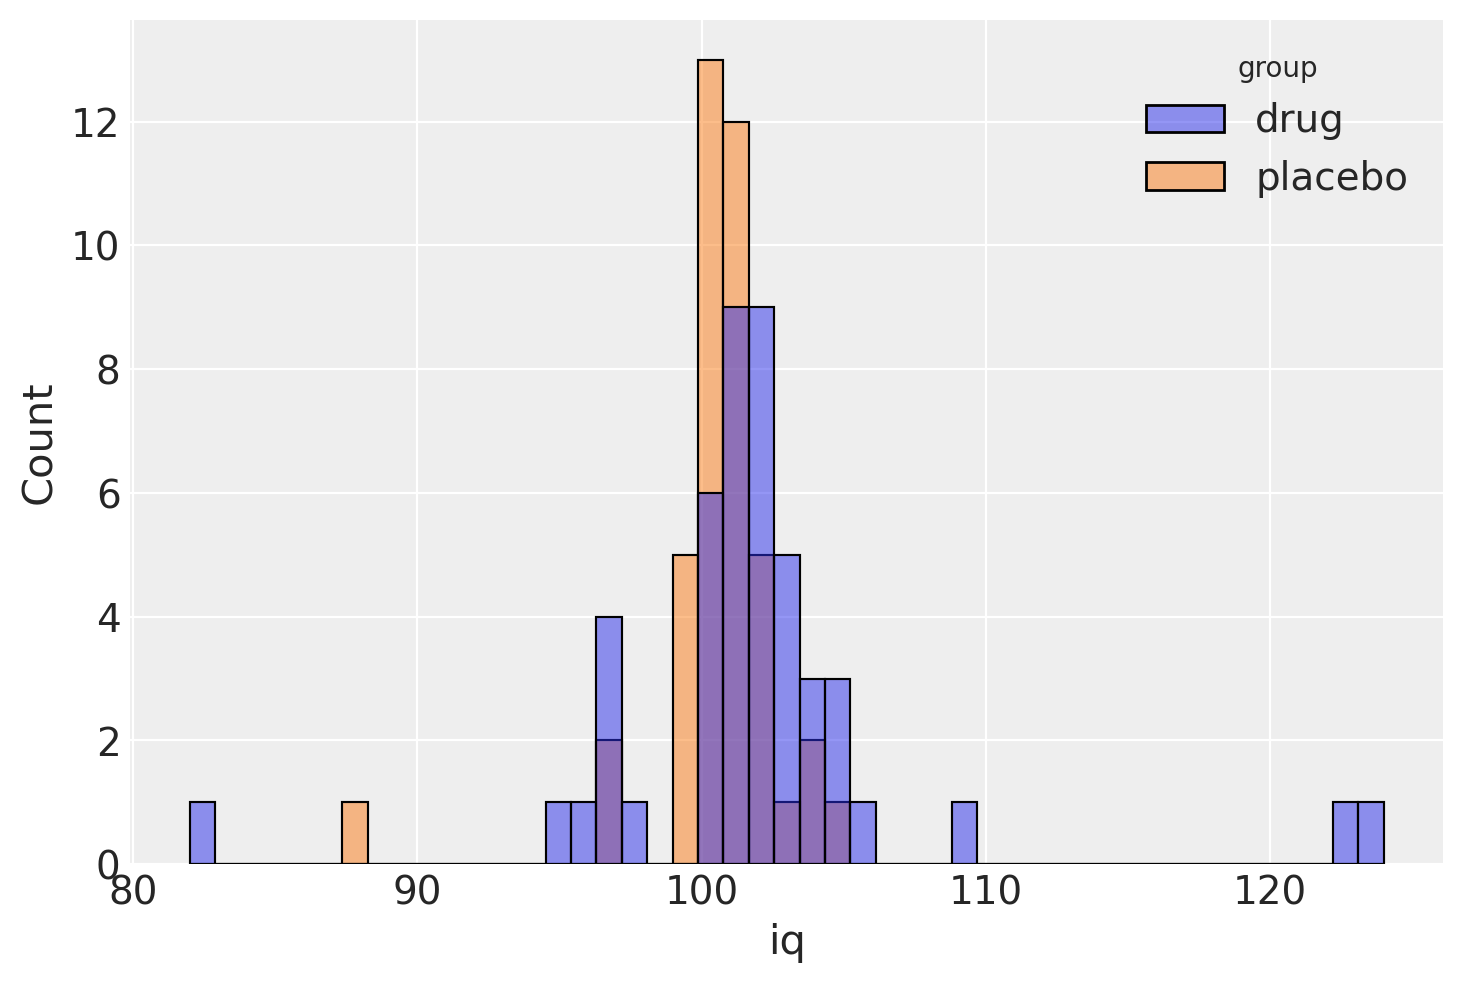

In [4]:
# fmt: off
iq_drug = np.array([
    101, 100, 102, 104, 102, 97, 105, 105, 98, 101, 100, 123, 105, 103, 
    100, 95, 102, 106, 109, 102, 82, 102, 100, 102, 102, 101, 102, 102,
    103, 103, 97, 97, 103, 101, 97, 104, 96, 103, 124, 101, 101, 100,
    101, 101, 104, 100, 101
])


iq_placebo = np.array([
    99, 101, 100, 101, 102, 100, 97, 101, 104, 101, 102, 102, 100, 105,
    88, 101, 100, 104, 100, 100, 100, 101, 102, 103, 97, 101, 101, 100,
    101, 99, 101, 100, 100, 101, 100, 99, 101, 100, 102, 99, 100, 99
])
# fmt: on

df1 = pd.DataFrame({"iq": iq_drug, "group": "drug"})
df2 = pd.DataFrame({"iq": iq_placebo, "group": "placebo"})
indv = pd.concat([df1, df2]).reset_index()
indv["group"] = indv["group"].astype("category")

sns.histplot(data=indv, x="iq", hue="group");

In [5]:
idata = bst.compare_two_groups(indv["iq"], indv["group"], 1, 10)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_one, group2_std, group1_std, group2_mean, group1_mean]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


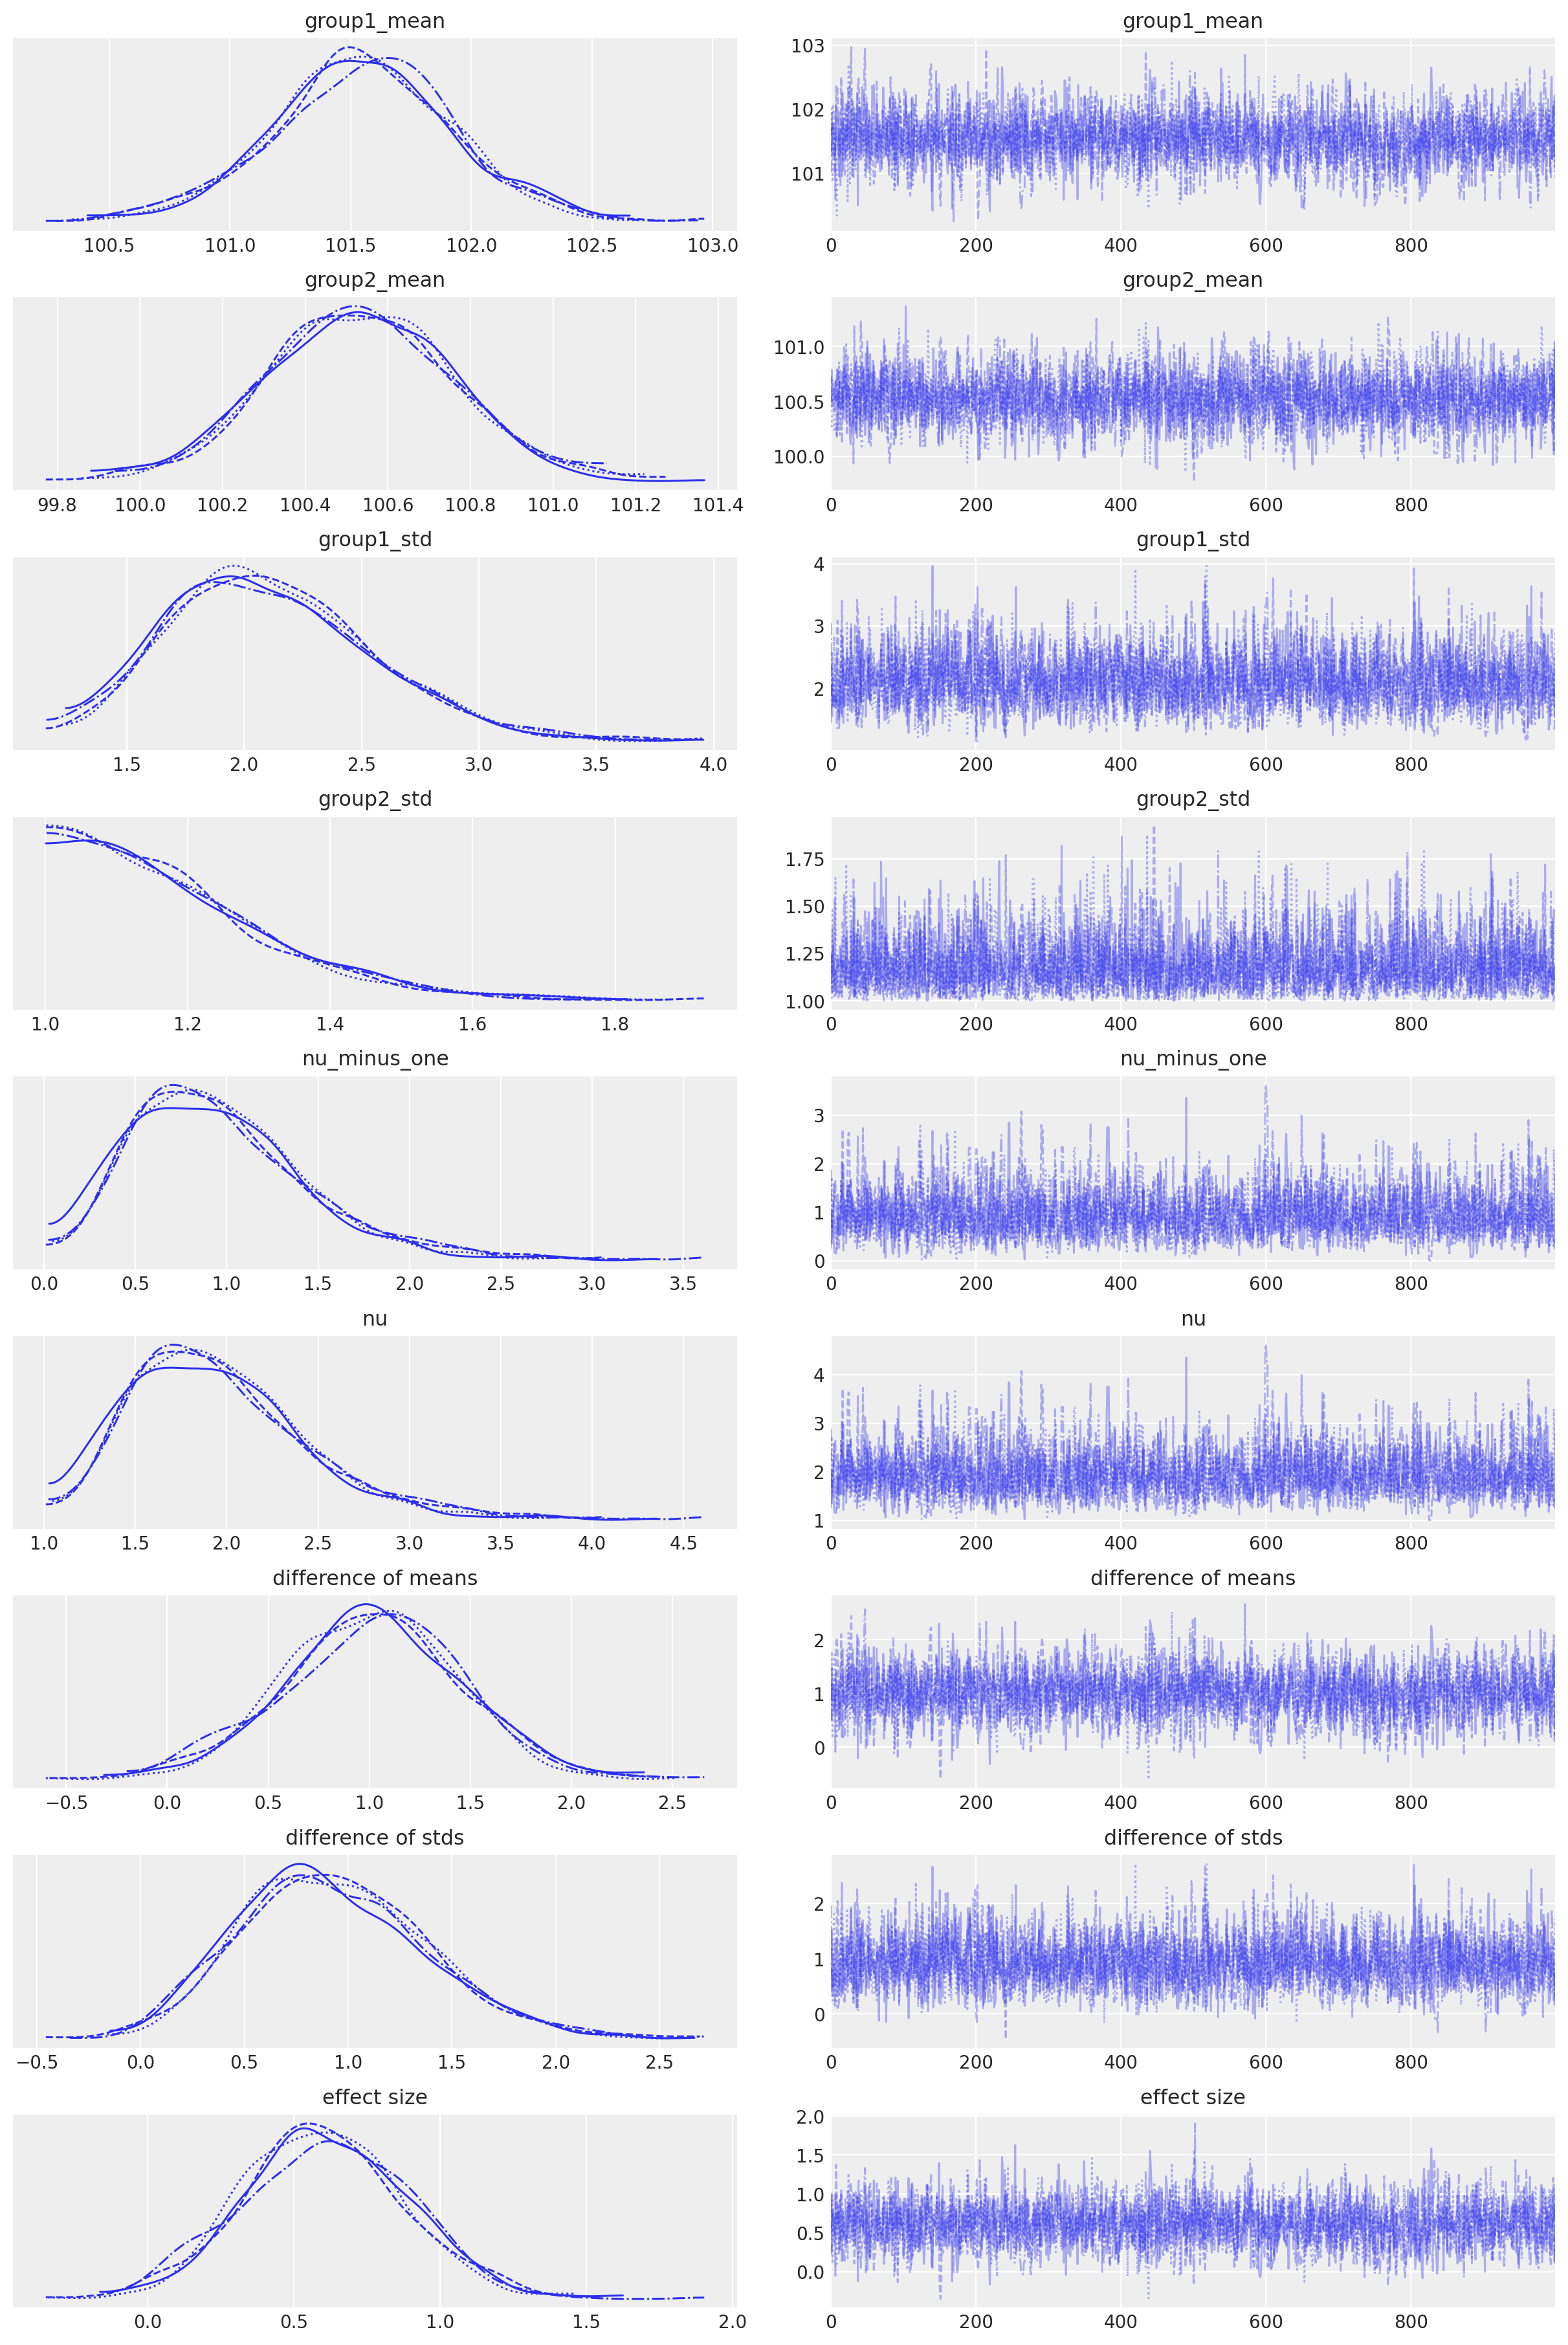

In [6]:
# Assess your MCMC chains.
az.plot_trace(idata);

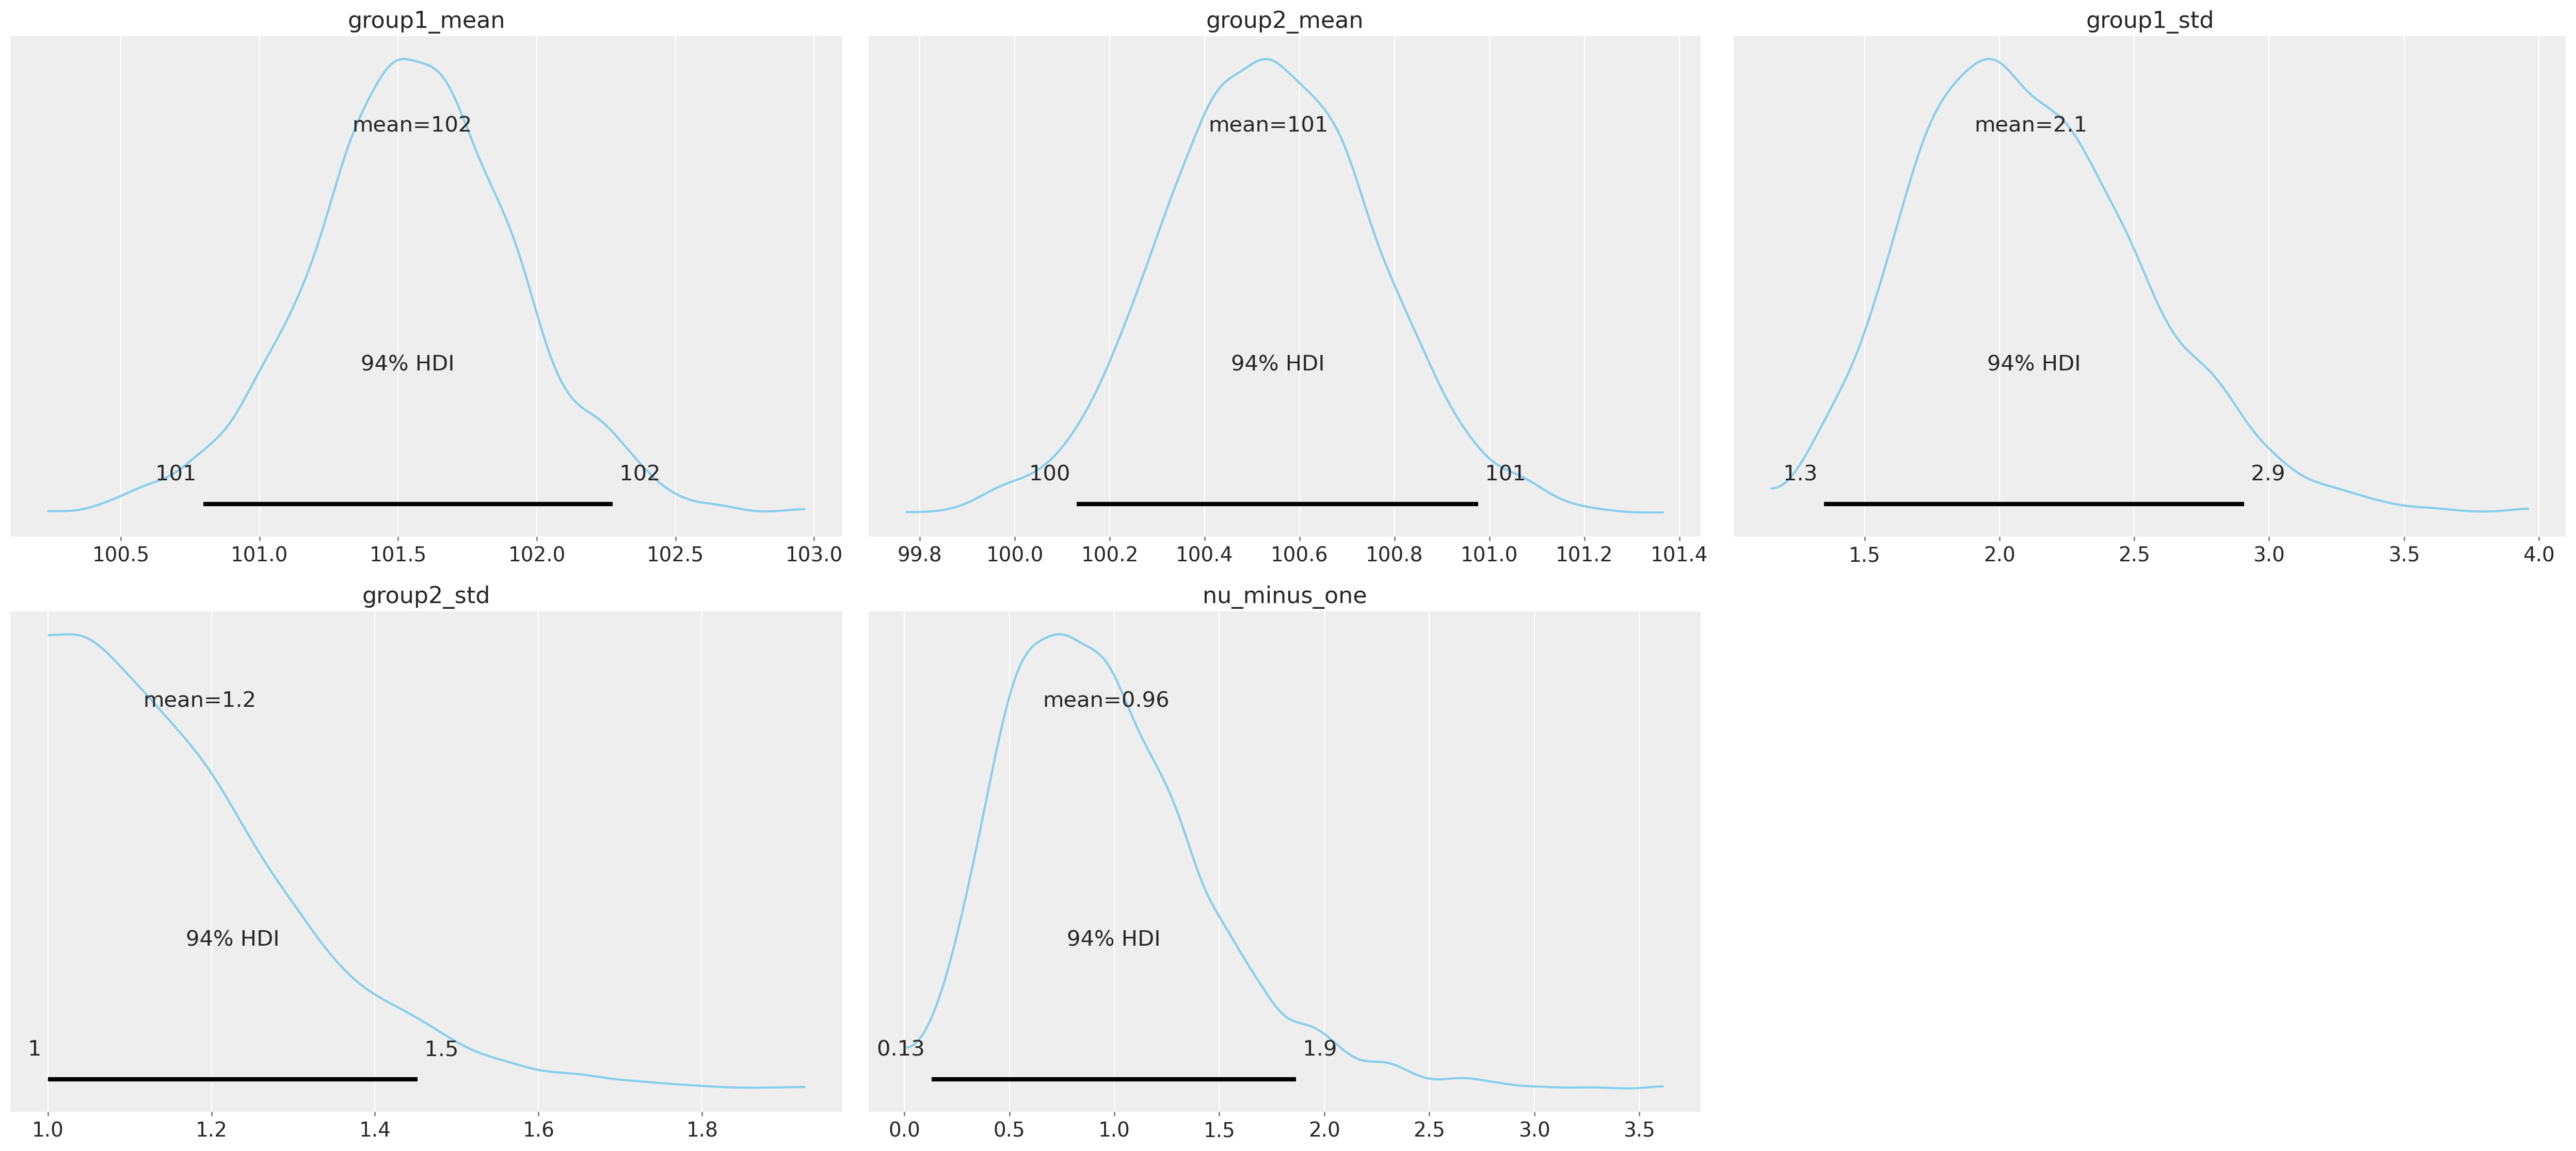

In [7]:
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "nu_minus_one"],
    color="#87ceeb",
);

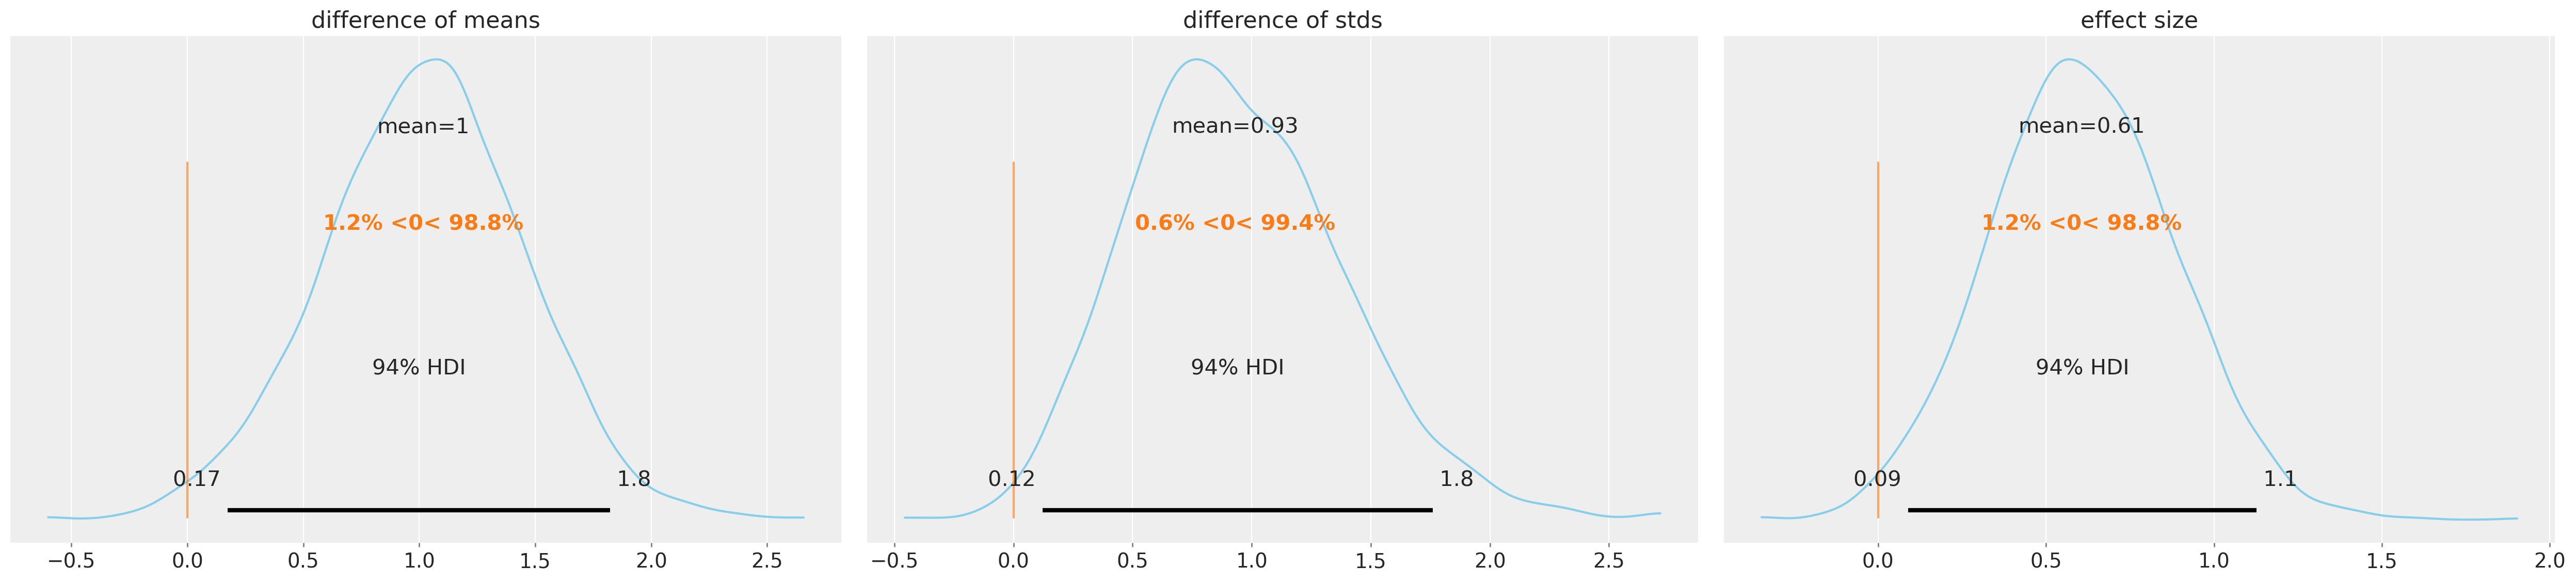

In [8]:
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

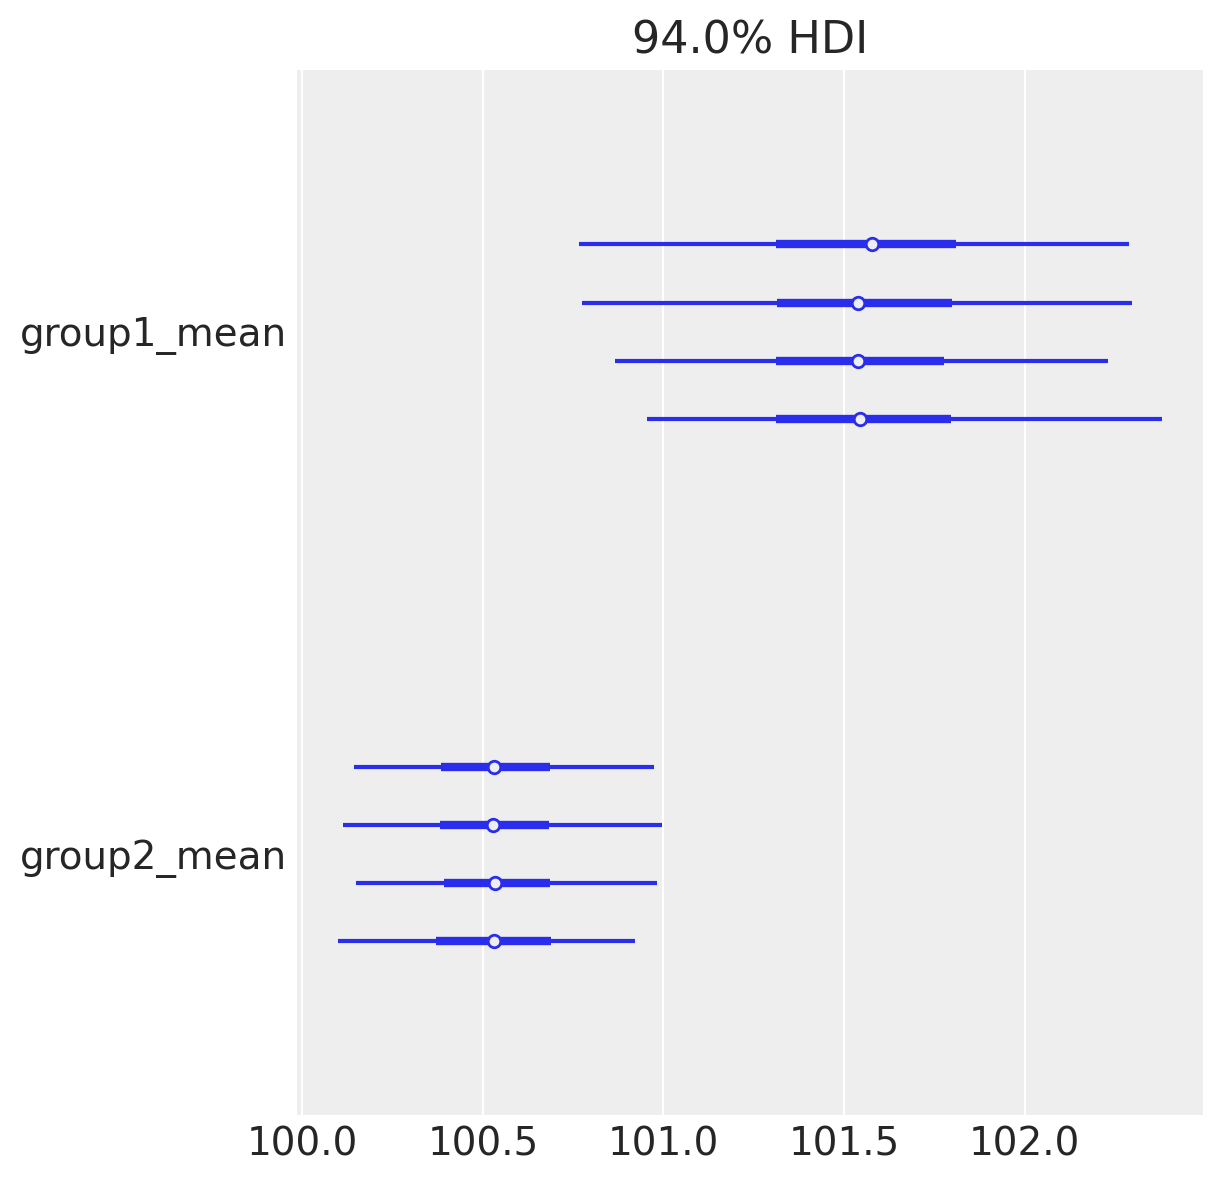

In [9]:
# Plot parameter estimates
az.plot_forest(idata, var_names=["group1_mean", "group2_mean"]);

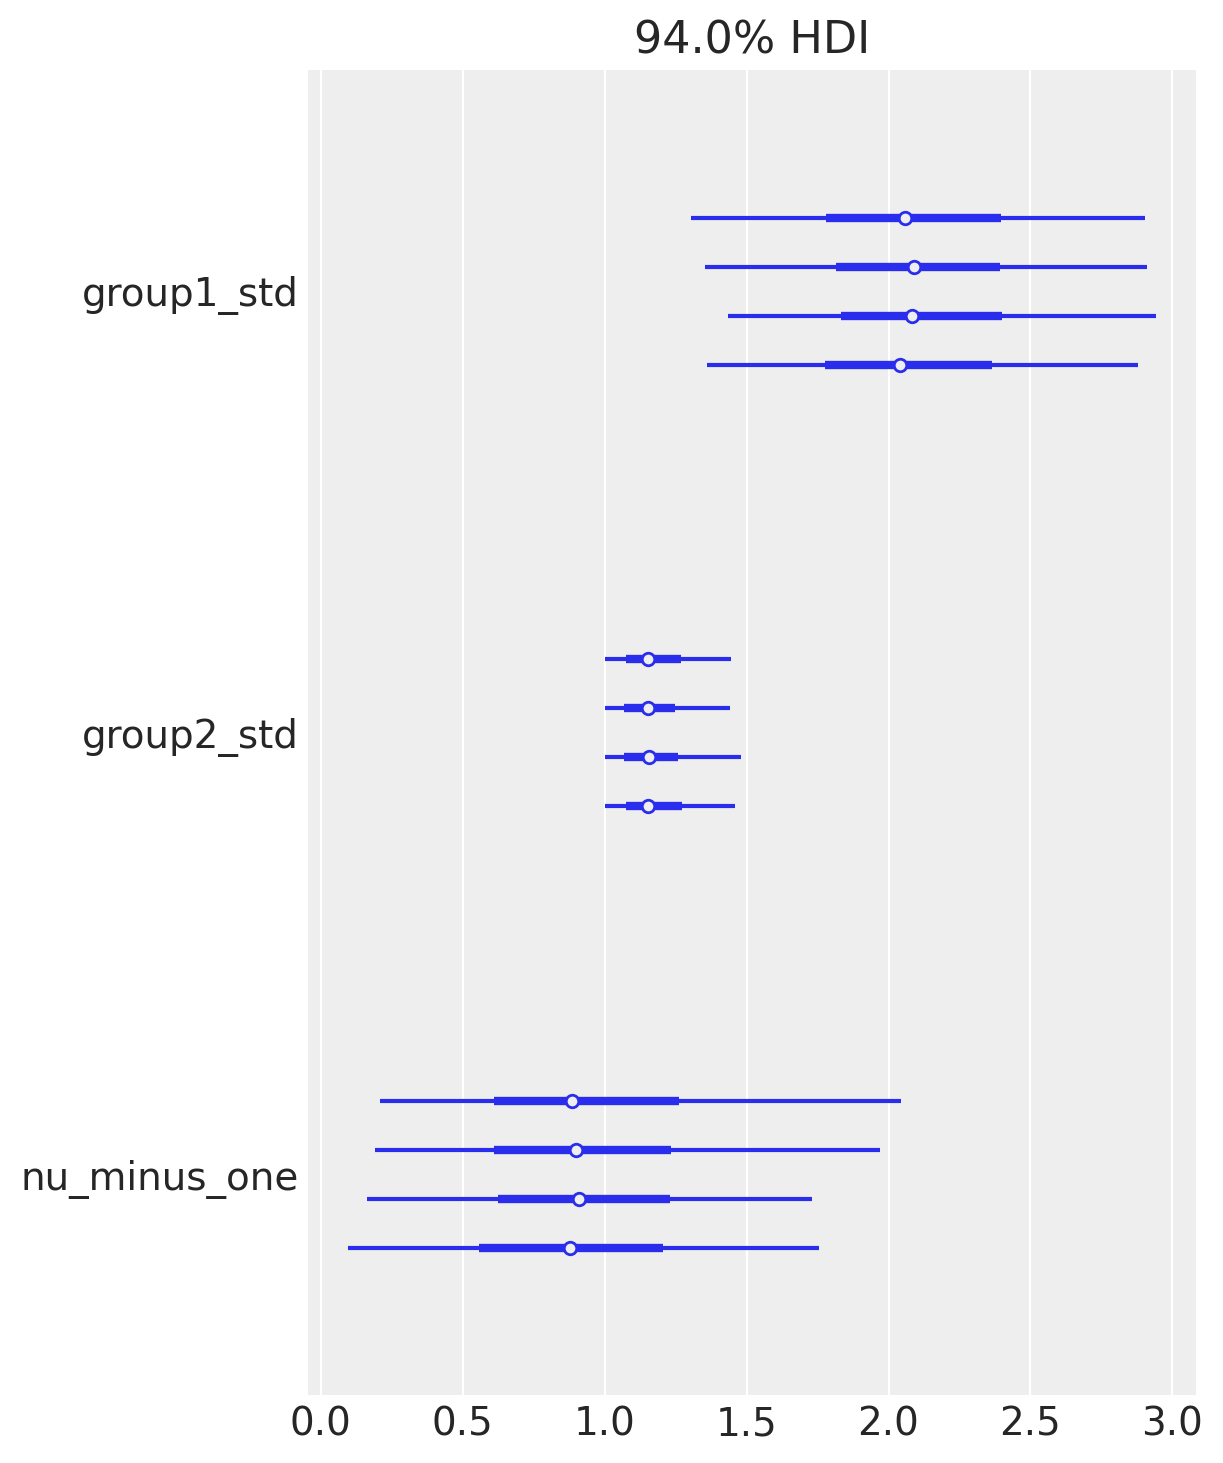

In [10]:
# Plot parameter estimates
az.plot_forest(idata, var_names=["group1_std", "group2_std", "nu_minus_one"]);

In [11]:
# Assess the health of your chains
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group1_mean,101.551,0.382,100.797,102.273,0.008,0.005,2496.0,1759.0,1.0
group2_mean,100.534,0.225,100.131,100.977,0.004,0.003,2698.0,2304.0,1.0
group1_std,2.116,0.433,1.350,2.907,0.009,0.006,2255.0,2067.0,1.0
group2_std,1.186,0.146,1.000,1.452,0.003,0.002,2723.0,1858.0,1.0
nu_minus_one,0.960,0.489,0.130,1.866,0.010,0.007,2223.0,1933.0,1.0
nu,1.960,0.489,1.130,2.866,0.010,0.007,2223.0,1933.0,1.0
difference of means,1.017,0.437,0.173,1.823,0.009,0.006,2452.0,2010.0,1.0
difference of stds,0.930,0.447,0.123,1.760,0.009,0.006,2374.0,2198.0,1.0
effect size,0.606,0.277,0.090,1.126,0.006,0.004,2385.0,1795.0,1.0
